In [1]:
%%configure -f
{ "numExecutors": 2, "executorCores": 1, "executorMemory": "1gb" }

In [2]:
sc

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
15,application_1637717202829_0016,pyspark,idle,Link,Link,arik,✔


SparkSession available as 'spark'.


<SparkContext master=yarn appName=arik;1638563564283>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import healpy
from pyspark.sql import Row
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import LongType

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
5,application_1637717202829_0006,pyspark,idle,Link,Link,arik,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
fire = spark.read.parquet('hdfs:///data/apogee_fire/m12f_lsr0')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
fire.createOrReplaceTempView('fire')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
spark.sql('''
SELECT count(*) FROM fire
''').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|  count(1)|
+----------+
|5851407276|
+----------+

In [6]:
fire.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- 2mass_magh: double (nullable = true)
 |-- 2mass_magh_error: double (nullable = true)
 |-- 2mass_magh_int: double (nullable = true)
 |-- 2mass_magh_true: double (nullable = true)
 |-- 2mass_magj: double (nullable = true)
 |-- 2mass_magj_error: double (nullable = true)
 |-- 2mass_magj_int: double (nullable = true)
 |-- 2mass_magj_true: double (nullable = true)
 |-- 2mass_magks: double (nullable = true)
 |-- 2mass_magks_error: double (nullable = true)
 |-- 2mass_magks_int: double (nullable = true)
 |-- 2mass_magks_true: double (nullable = true)
 |-- a0: double (nullable = true)
 |-- cfe_apogee: double (nullable = true)
 |-- cafe_apogee: double (nullable = true)
 |-- feh_apogee: double (nullable = true)
 |-- mgfe_apogee: double (nullable = true)
 |-- nfe_apogee: double (nullable = true)
 |-- ofe_apogee: double (nullable = true)
 |-- sfe_apogee: double (nullable = true)
 |-- sife_apogee: double (nullable = true)
 |-- a_g_bp_val: double (nullable = true)
 |-- a_g_rp_val: double (nu

In [8]:
spark.sql('''
SELECT min(age) as minage, max(age) as maxage, min(mgfe_apogee) as minmgfe, max(nanvl(mgfe_apogee, 0)) as maxmgfe FROM fire
''').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+------------------+------------------+
|           minage|            maxage|           minmgfe|           maxmgfe|
+-----------------+------------------+------------------+------------------+
|3.697340965270996|10.134500503540039|-1.786245346069336|0.8958825469017029|
+-----------------+------------------+------------------+------------------+

In [9]:
hist = spark.sql('''
SELECT age_bucket/100 as age, feh_bucket/10 as feh, count(*) AS N FROM 
(
    SELECT cast(age*100 AS int) as age_bucket,
           cast(feh_apogee*10 AS int) as feh_bucket
    FROM fire
) 
GROUP BY age, feh
''').toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
hist.head(4)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    age  feh         N
0  9.85 -0.6    224078
1  9.34  0.0  20913169
2  8.57  0.0   4239535
3  8.72  0.0   6667528

In [70]:
plt.clf()
plt.hexbin(hist['age']**10, hist['feh'], C=hist['N'], bins='log', gridsize=(60, 30))
plt.xlabel('Age (Ga)')
plt.ylabel('[Fe/H]')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, '[Fe/H]')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

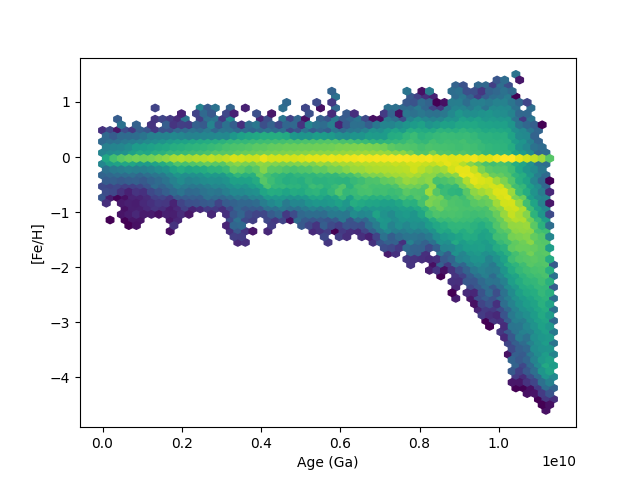

In [71]:
%matplot plt

In [23]:
mgfe = spark.sql('''
SELECT mgfe_bucket/100 as mgfe, feh_bucket/100 as feh, count(*) AS N FROM 
(
    SELECT cast(mgfe_apogee*100 AS int) as mgfe_bucket,
           cast(feh_apogee*100 AS int) as feh_bucket
    FROM fire
) 
GROUP BY mgfe, feh
''').toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
mgfep = mgfe.query('not (mgfe == 0.00 and feh == 0.0)')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
plt.clf()
plt.hexbin(mgfep['feh'], mgfep['mgfe'], C=mgfep['N'], bins='log', gridsize=(100, 100), mincnt=3)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, '[Mg/Fe]')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

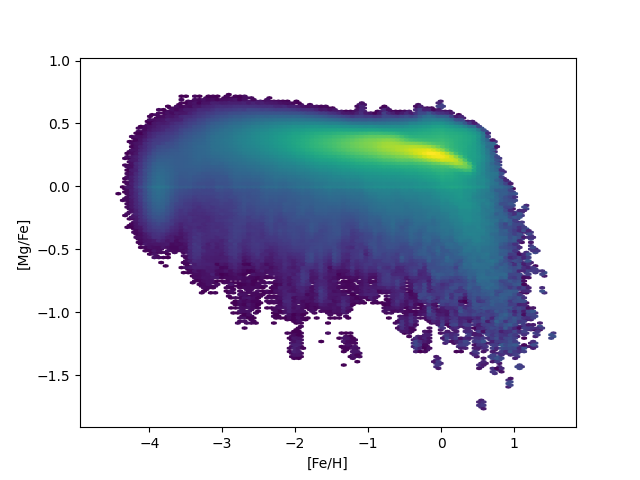

In [59]:
%matplot plt